In [19]:
# Install pdf modules
#!apt-get install PyPDF2
!pip install PyPDF2
#!apt-get install fpdf
!pip install fpdf
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [20]:
import csv
import os
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad
import glob
from fpdf import FPDF
from PyPDF2 import PdfFileMerger, PdfFileReader, PdfMerger

print("")
print("  ------------------------ HDActuatorTest ------------------------- ")
print(" ")
print(" HD Fundamental Test:")
#TODO: To review, seems out of date: print("     1. Perform a frequency sweep using 3 or more cycles at each frequency and extract the maximum peak-to-peak acceleration from the system response.")
print("     2. Select three frequencies that are perceptually distinct using this perception estimates in the Resources section of this document.")
print("     3. Verify that the output signal’s dominant frequency component is at the selected drive frequency in each case")
print("     4. For each frequency, measure the acceleration headroom above threshold of perception (use table in appendix)")
print("     5. If the amplitude range at all selected frequencies is .5G or higher, the component is HD")
print(" ")
print("  HDActuatorTest's csv input file must have the following data recorded in five columns: ")
print("      - time, drive amplitude, acceleration X, acceleration Y, acceleration Z") 
print(" ")      
print("  HDActuatorTest expects the input file's drive signal to have the following characteristics: ")
print("      - Frequency range: 50 - 500 Hz, increments of 5Hz")
print("      - Number of tested frequencies: 91 (50Hz, 55Hz, 60Hz,........, 495Hz, 500Hz)")
print("      - Sampling rate: 10kHz")
print("      - Number of samples per frequency between 100 (duration=100*0.0001 or 10ms) and 15000 (duration=15000*0.0001ms or 1.5s)  ") 
print(" ")


print("  Example of driving signal's characteristics used to generate the input file: ")
print("      * Magnitude: 3 Vpp ")
print("      * Frequency range: 50 - 500 Hz, increments of 5Hz ")
print("      * Number of samples: 91 ")
print("      * Number of samples per frequency:5000 or 0.5s per frequency ")
print("      * Sampling rate: 10kHz ")
print("      In this example the Input cvs file should have 91*5000 lines/samples ")
print("")
print("  Running the test:")
print("       Run the HDActuatorTest.ipynb script.")  
print("       Please copy your output file in the same folder that contains the HDActuatorTest.ipynb")
print("       or HDActuatorTest.exe before running the script or the executable")
print("  ------------------------------------------------------------------ ")
print("")
print("These csv files are available:")

# if we are running in Google colaboratory, we need to mount the drive, go to My Drive/HD Actuator Specification/Haptic Reactor folder 
# in order to access the csv files that we copied there with the script file.
# If are running locally, we should be already in the script folder
try:
    import google.colab
    print("Running the test in Google colaboratory")
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/My Drive/HD Actuator Specification/Haptic Reactor')
except:
    print("Running the test locally, outside Google colaboratory")

for file in glob.glob("*.csv"):
    print(" -", file)

fileName = input("Please copy/enter one of these csv files' name: ")

if (os.path.isfile(fileName)) is False:
    print("This file does not exist in the script directory ", fileName) 
    raise SystemExit("Please enter a name of a file that exists")

while True:
    text = input('Enter number of Samples per frequency used by the Input file (ex:5000, 10000 or 15000) : ')
    if text.isnumeric():
        if (int(text) < 1000):
            continue
        if (int(text) > 15000):
            continue
        else:
            break

singleFrqDataSize = int(text);

while True:
    text = input("Please Enter Acceleration Axis to be used for the test: X(x), Y(y), or Z(z) ")
    if (text.lower() == "x") :
       accIdx=2
       break
    if (text.lower() == "y") :
       accIdx=3
       break
    if (text.lower() == "z") :
       accIdx=4
       break
        
AccelerationAxeUsed=text.upper()
    
while True:
    text = input("Please Enter type of device: H(h) for Handleld or S(s) for Suspended ")
    if (text.lower() == "h") :
       expectedDynamicHeadRoom = 0.5
       resultsFileName = "HD_HandheldSystem_Results.pdf"
       break
   
    if (text.lower() == "s") :
       expectedDynamicHeadRoom = 2.0
       resultsFileName = "HD_SuspendedSystem_Results.pdf"
       break
        
testData = np.genfromtxt(fileName, delimiter=',')
numRow, numColumn = (np.shape(testData))

#
# Threshold of perception values
# adapted from Morioka, Griffin, 'Magnitude-dependence of equivalent comfort contours for force-and-aft, lateral and vertical hand-transmitted vibration', Journal of Sound and Vibration, 295 (2006) 633-648.
#
frequencyIdx_ToP    = [8,      10,  12.5,    16,   20,    25,   31.5,    40,    50,    63,    80,   100,   125,   160,   200,   250,   315 ]
mag_acc_ms2_rms_ToP = [0.095, 0.1, 0.095, 0.108, 0.15,  0.16,  0.109, 0.065, 0.072, 0.049, 0.028, 0.023, 0.022, 0.021, 0.029, 0.032, 0.061]

accelToP_RMS = interp1d( frequencyIdx_ToP, mag_acc_ms2_rms_ToP, fill_value ='extrapolate')

#
# Frequency discrimination threshold
# 
frequencyIdx_JND = [50,70,90,110,130,150,170,190,210,230,250]
frequency_JND = [16,25.4,32.1,38.9,43.2,40.2,37.2,34.1,31.1,28.0,25.0]
freqJND = interp1d( frequencyIdx_JND, frequency_JND, fill_value ='extrapolate' )


  ------------------------ HDActuatorTest ------------------------- 
 
 HD Fundamental Test:
     2. Select three frequencies that are perceptually distinct using this perception estimates in the Resources section of this document.
     3. Verify that the output signal’s dominant frequency component is at the selected drive frequency in each case
     4. For each frequency, measure the acceleration headroom above threshold of perception (use table in appendix)
     5. If the amplitude range at all selected frequencies is .5G or higher, the component is HD
 
  HDActuatorTest's csv input file must have the following data recorded in five columns: 
      - time, drive amplitude, acceleration X, acceleration Y, acceleration Z
 
  HDActuatorTest expects the input file's drive signal to have the following characteristics: 
      - Frequency range: 50 - 500 Hz, increments of 5Hz
      - Number of tested frequencies: 91 (50Hz, 55Hz, 60Hz,........, 495Hz, 500Hz)
      - Sampling rate: 10kHz
  

In [21]:
#testData = np.genfromtxt('VCM_3Cycles.csv', delimiter=',') # singleFrqDataSize=5200, accIdx=1, freqNumSamples=90
#testData = np.genfromtxt('Force Reactor_4Vp-p_10cycles.csv', delimiter=',')# singleFrqDataSize=5000, accIdx=3,4, freqNumSamples=91
#testData = np.genfromtxt('Force Reactor_4Vp-p_5cycles.csv', delimiter=',')# singleFrqDataSize=5000, accIdx=3,4, freqNumSamples=91
#testData = np.genfromtxt('Force Reactor 3Vpp 10cycles 100g mass.csv', delimiter=',')
#testData = np.genfromtxt('for_HD_report_org.csv', delimiter=',')
#testData = np.genfromtxt('f200.csv', delimiter=',')
#testData = np.genfromtxt('for_HD_report.csv', delimiter=',')

In [22]:

#singleFrqDataSize=10000 # this is a variable now
#accIdx=3 # this is a variable now
freqNumSamples=91
startFreq = 50
endFreq = 500
expectedNumRow = singleFrqDataSize * freqNumSamples

if (numRow < expectedNumRow):
    print("Not enough Number of samples in the: ", fileName, ". It had ", numRow, " but ", expectedNumRow, "(",singleFrqDataSize, "*", freqNumSamples, ")", "is expected") 
    raise SystemExit("Please fix the input file")

if (numRow > expectedNumRow):
    testData = testData[:expectedNumRow, :]
    print(fileName, "had too much samples (", numRow, ")", " the test will use only the first ", expectedNumRow, " rows") 
    
numRow, numColumn = (np.shape(testData))

print("--------------- Frequency Sweep test parameters  ----------")
print("Input file name              :", fileName) 
print("Number of samples in the file:", numRow)
print("singleFrqDataSize            :", singleFrqDataSize)
print("expectedDynamicHeadRoom      :", expectedDynamicHeadRoom)
print("--------------------------------------------------------------") 
#print( testData[0:testData.size,accIdx])
freqData = testData[0:testData.size,accIdx].reshape(-1,singleFrqDataSize)
timeData = testData[0:singleFrqDataSize,0]
inputFreq = np.linspace(startFreq,endFreq,freqNumSamples)

--------------- Frequency Sweep test parameters  ----------
Input file name              : hd_sensor2.csv
Number of samples in the file: 455000
singleFrqDataSize            : 5000
expectedDynamicHeadRoom      : 0.5
--------------------------------------------------------------


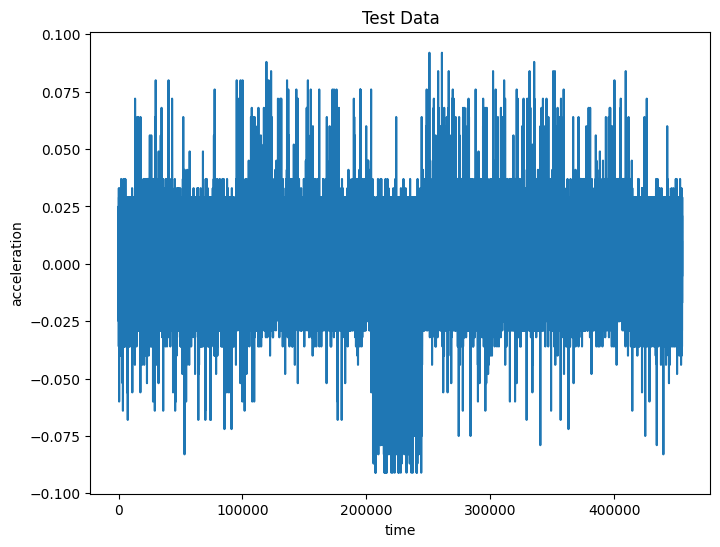

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6),  facecolor='w', edgecolor='k') 
plt.xlabel('time') 
plt.ylabel('acceleration')
plt.title('Test Data')
plt.plot( testData[0:testData.size,accIdx] )

(91, 5000)


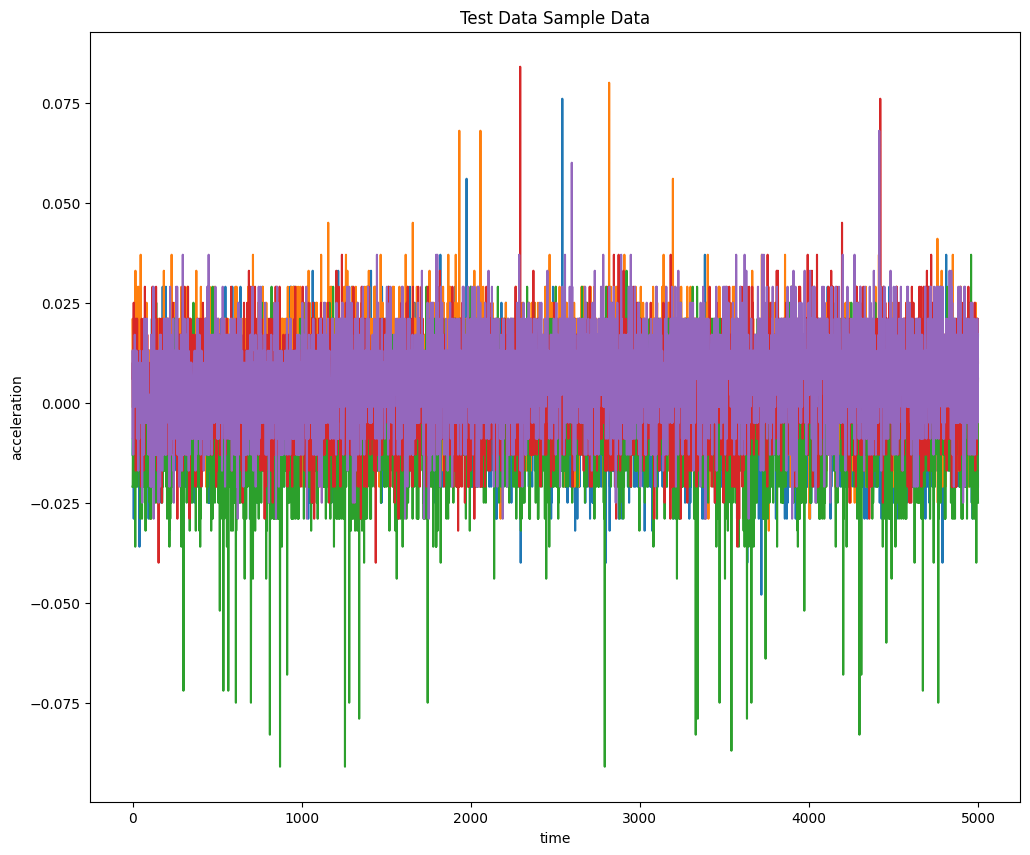

In [24]:
figure(num=None, figsize=(12, 10),  facecolor='w', edgecolor='k') 
plt.xlabel('time') 
plt.ylabel('acceleration')
plt.title('Test Data Sample Data')

# superimpose the time domain acceleration respose to input at different frequencies
plotSampleIndices = [1,2,3,4,5 ]
for x in plotSampleIndices:
  plt.plot(freqData[int(freqNumSamples/6*x),:]) 
print(freqData.shape)
plt.savefig('figure1.pdf')

HD Fundamental Test

---



1. Perform a frequency sweep using 3 or more cycles at each frequency and extract the maximum peak-to-peak acceleration from the system response.
2. Select three frequencies that are perceptually distinct using this perception estimates in the Resources section of this document.
3. Verify that the output signal’s dominant frequency component is at the selected drive frequency in each case
4. For each frequency, measure the acceleration headroom above threshold of perception (use table in appendix)
5. If the amplitude range at all selected frequencies is .5G or higher, the component is HD




In [25]:
#
# Given timeseries sampled at time_step s, compute the frequency of the peak of the power spectrum
#
def peakFrequency( testFrequency, data, time_step, doPlot=False ):
  rate = 1/time_step

  # compute real FFT
  p_raw = np.abs(np.fft.rfft(data))
  p = 20*np.log10(p_raw)

  # array of frequencies
  f = np.linspace(0, rate/2, len(p))

  # find index of largest elements
  idx = np.argsort( -p )

  # compute pk-pk acceleration
  accIdx = np.argsort( data )
  pkpk = data[accIdx[accIdx.size-1]]-data[accIdx[0]]

  # find pkpk perceptual threshold at this frequency
  # Convert RMS thresholds to pk-pk to enable comparison PkPk = 2* sqrt(2) * RMS (assumes RMS values are based on sin waves)
  accelToP_PkPk = 2.0*np.sqrt(2.0)*accelToP_RMS( testFrequency )

  dynamicHeadroom = pkpk - accelToP_PkPk 

  # compute distortion
  power = interp1d( f, p_raw, fill_value ='extrapolate')

  # find the perceptual range for the test frequency
  freqLimit = freqJND( testFrequency )
  # integrate the output power in the perceptual range of the test frequency
  #
  sampleFreqs = np.arange( testFrequency-freqLimit, testFrequency+freqLimit, 1 )
  testPower = np.sum( power( sampleFreqs ) )

  # integrate from 0-500Hz
  #
  sampleFreqs = np.arange( 0, 500, 1 )
  totalPower = np.sum( power(sampleFreqs) )

  # calculate how much output energy is in the perceptual band of the drive signal as a fraction of total output energy (as a percentage)
  distortion = 100*(1.0 - testPower/totalPower)

  return [ f[idx[0]], pkpk, dynamicHeadroom, distortion] #rmsPk, rmsTime ]

In [26]:
def checkInputFrequencies( freq1, freq2, printlog = False ):
    freqDiff = abs( freq1-freq2 )
    maxFreqJND = max( freqJND(freq1), freqJND(freq2))

    if( freqDiff < maxFreqJND ):
      if printlog:
        print( '    Test frequencies ' + str(freq1) + 'Hz '+ str(freq2) + 'Hz are closer than ' + str( maxFreqJND ) + 'Hz' )
      return False
    else:
      return True


Quality Factor: nan


C:\Users\latyr\AppData\Local\Temp\ipykernel_29384\3612723644.py:68: RuntimeWarning: invalid value encountered in scalar divide
  print( 'Quality Factor: ' + str( outFreq[pkIdx]/(maxFreqs[maxFreqs.size-1] - maxFreqs[0] )) )


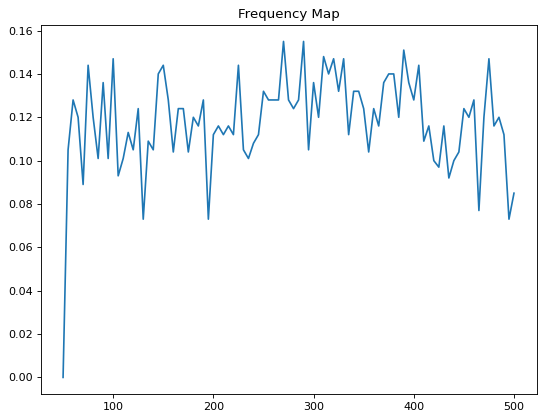

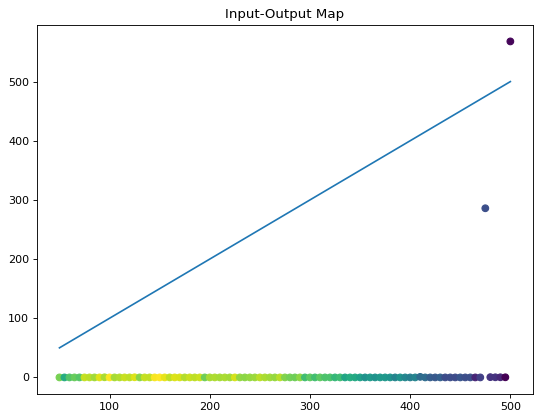

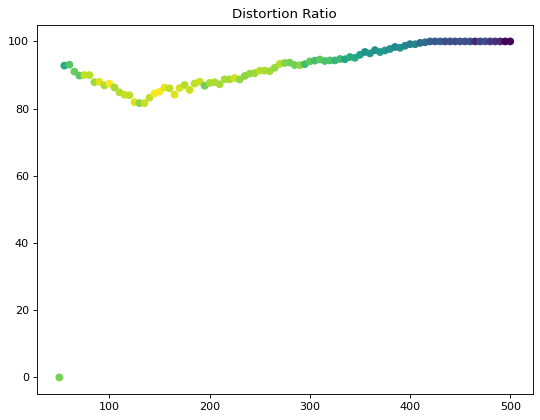

In [27]:
#
# For all available time series, compute the peak frequency and plot input-output map
#
# We'll use this information to guess some test frequency points
#
diagX = [50,500]
diagY = [50,500]
time_step = (timeData[2]-timeData[1])

idx = range(1,freqNumSamples)
outFreq = np.zeros(freqNumSamples)
outMagnitude = np.zeros(freqNumSamples)
pkpkOut = np.zeros(freqNumSamples)
distortion = np.zeros(freqNumSamples)
pkOutput = 0.0
pkIdx = -1

# indices of the HD test frequencies
testFreqIdx = [0,0,0]
lastTestFreq = 0.0
currTestIdx = 0

for i in idx:
    freqOut = peakFrequency( inputFreq[i], freqData[i,:], time_step )
    outFreq[i] = freqOut[0]
    pkpkOut[i] = freqOut[1]
    outMagnitude[i] = freqOut[2]
    distortion[i] = freqOut[3]

    if outMagnitude[i] > pkOutput:
        pkOutput = outMagnitude[i]
        pkIdx = i
    
    if currTestIdx < 3:    
      # if the dynamic range is greater than the headroom
      if outMagnitude[i] > expectedDynamicHeadRoom:
        # if the frequencies are sufficently separate
        if checkInputFrequencies( inputFreq[i], lastTestFreq ):
          testFreqIdx[currTestIdx] = i
          lastTestFreq = inputFreq[i]
          currTestIdx = currTestIdx + 1
          print( ' Candidate test frequency :' + str( lastTestFreq ) + ' Index ' + str( testFreqIdx ))

#print( 'Candidate test frequencies:' + str( inputFreq[testFreqIdx[0]] )+ ' '+ str( inputFreq[testFreqIdx[1]]) + ' '+ str( inputFreq[testFreqIdx[2]]) + ' ')

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k' )
plt.title( 'Frequency Map')
plt.plot( inputFreq, pkpkOut)
plt.savefig('figure2.pdf')

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k' )
plt.title( 'Input-Output Map') 
plt.scatter( inputFreq, outFreq, c=outMagnitude )
plt.plot( diagX, diagY )
plt.savefig('figure3.pdf')

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k') 
plt.title( 'Distortion Ratio') 
plt.scatter( inputFreq, distortion, c=outMagnitude )
plt.savefig('figure4.pdf')

#
# Estimate Q value
#
# Find peak frequency
halfMax = pkOutput/2
maxFreqs = outFreq[outMagnitude > halfMax ] 
print( 'Quality Factor: ' + str( outFreq[pkIdx]/(maxFreqs[maxFreqs.size-1] - maxFreqs[0] )) ) 

In [28]:
pdfLineCount = 0
def printPdf(textData, linePreIncrement):
    global pdfLineCount
    pdfLineCount += linePreIncrement
    pdf.cell(200, 10, txt=textData, ln=pdfLineCount, align="L")
    print(textData)

In [29]:
#
# Select 3 distinct frequency indicies
#
import time
timestr = time.strftime("%Y-%m-%d-%H:%M:%S")

idx = testFreqIdx #[1,8,17]
testFreq = inputFreq[idx]

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=10)

# print to pdf file
printPdf("", 1)
printPdf("===================== HDActuatorTest TEST RESULTS =====================", 1)
printPdf("Test time: " + str(timestr), 1)
printPdf("Test parameters:", 1)
printPdf("   - Input file name              : " + str(fileName), 1)
printPdf("   - Number of samples in the file: " + str(numRow), 1)
printPdf("   - Number of sample per frequency: " + str(singleFrqDataSize), 1)
printPdf("   - Acceleration Axis used: " + str(AccelerationAxeUsed) , 1)
printPdf("   - Starting frequency : 50Hz", 1)
printPdf("   - Ending frequency : 500Hz", 1)
printPdf( '\nTest Frequencies: ' + str(testFreq[0]) + 'Hz ' + str(testFreq[1]) + 'Hz ' + str(testFreq[2]) + 'Hz ', 1)

if (expectedDynamicHeadRoom == 0.5):
    printPdf("   - Device type: Handheld; Expected Dynamic HeadRoom is " +  str(expectedDynamicHeadRoom) + 'G' , 1)
else:
    printPdf("   - Device type: Suspended;  Expected Dynamic HeadRoom is " +  str(expectedDynamicHeadRoom) + 'G' , 1)

printPdf("",1)

#
# Frequency discrimination check 
#
goodTestFrequencies = True

if( checkInputFrequencies( testFreq[0], testFreq[1]) == False):
    goodTestFrequencies = False
    
if( checkInputFrequencies( testFreq[1], testFreq[2]) == False):
    goodTestFrequencies = False

if( checkInputFrequencies( testFreq[0], testFreq[2]) == False):
    goodTestFrequencies = False

partPass = False
if( goodTestFrequencies ):
    printPdf("Test frequencies are perceptually distinct. Proceeding with signal analysis.", 1)
  
    # constant sampling
  

    # assume part passed
    partPass = True

    #
    # For each test frequency, test the input-output frequency performance and dynamic headroom
    #
    for i in idx:

        inFreq = inputFreq[i]

        [outFreq, pkpkAcc, dynamicHeadroom, distortion ] = peakFrequency( inFreq, freqData[i,:], time_step )
    
        txt = 'Input Frequency: {:.2f}'.format(inFreq) + ' ({:.2F},'.format(
            inFreq - freqJND(inFreq)) + '{:.2f})'.format(
            inFreq + freqJND(inFreq)) + ' Peak Frequency: {:.2f}'.format(
            outFreq) + 'Hz ' + 'Acceleration Peak: {:.2f}'.format(pkpkAcc) + 'G' + ' Distortion: {:.2f}%'.format(distortion)
        printPdf(txt, 2)

        #
        # Check if the peak output frequency is within the frequency threshold
        #
        #fRange = freqJND( inputFreq[i] )
        #if( abs( outFreq-inputFreq[i])> fRange ):
        #    txt = '\n     FAIL frequency mapping requirement: {:.2f}'.format(outFreq) + ' -{:.2f} > '.format(inFreq) + '{:.2f}'.format(fRange)
        #    printPdf(txt, 2)
        #    partPass = False
    

        # Check if the headroom is greater than 0.5G 
        # TODO: need to calculate RMS based on the non-zero signal period

        if( dynamicHeadroom <  expectedDynamicHeadRoom):
            printPdf('   ----> FAIL dynamic headroom requirement',  1)
            partPass = False
else:
    txt = '============ Select New Test Frequencies ==========='
    printPdf(txt, 1)

if( partPass == False ):
    printPdf('============ Part FAILED ===========', 1)
else:
    printPdf('============ Part PASSED ===========', 1)

pdf.output("result.pdf")


===================== HDActuatorTest TEST RESULTS =====================
Test time: 2024-08-19-00:09:32
Test parameters:
   - Input file name              : hd_sensor2.csv
   - Number of samples in the file: 455000
   - Number of sample per frequency: 5000
   - Acceleration Axis used: X
   - Starting frequency : 50Hz
   - Ending frequency : 500Hz

Test Frequencies: 50.0Hz 50.0Hz 50.0Hz 
   - Device type: Handheld; Expected Dynamic HeadRoom is 0.5G

============ Select New Test Frequencies ===========
============ Part FAILED ===========


''

In [30]:
from PyPDF2 import PdfFileMerger, PdfFileReader, PdfMerger, PdfReader

#---------- Output results pdf file -----------
merger = PdfMerger()
merger.append(PdfReader("result.pdf", 'rb'))
merger.append(PdfReader("figure1.pdf", 'rb'))
merger.append(PdfReader("figure2.pdf", 'rb'))
merger.append(PdfReader("figure3.pdf", 'rb'))
merger.append(PdfReader("figure4.pdf", 'rb'))
merger.write(resultsFileName)

#-------- Delete individual pdf files ---------
os.remove("figure1.pdf")
os.remove("figure2.pdf")
os.remove("figure3.pdf")
os.remove("figure4.pdf")
os.remove("result.pdf")
